# Convert GTSRB to YOLO Format

This notebook is used to convert the German Traffic Sign Recognition Benchmark Dataset to a format that is acceppted by YOLO.

The output dataset is in the format:
```
/GTRSB
    /images
        /train
            00000001.png
            .
            .
        /test
            00000001.png
            .
            .
    /labels
        /train
            00000001.txt
            .
            .
        /test
            00000001.txt
            .
            .
```

# Importing & Defining Functions

In [88]:
import csv
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import shutil
import os

In [89]:
def display_image_box(img_path, box):
    """
    Display image and draw a box on the image.
    
    Args:
        - img_path: str - path to image
        - box: [int, int, int, int] - [x1, y1, x2, y2]
    """
    image = Image.open(img_path)
    
    draw = ImageDraw.Draw(image)
    draw.rectangle(box, outline="red")
    
    plt.imshow(image, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [90]:
def convert_bbox_format_to_yolo(x1, y1, x2, y2):
    """Convert bounding box format from (x1, y1, x2, y2) to (width, height, x, y)."""
    
    # Calculate width and height of the box
    width = x2 - x1
    height = y2 - y1
    
    # Calculate center of the box
    x = x1 + width / 2
    y = y1 + height / 2
    
    x = round(x)
    y = round(y)
    
    
    return width, height, x, y

In [91]:
def convert_bbox_format_to_center_w_h(width, height, x, y):
    """Convert bounding box format to (x1, y1, x2, y2) from (center_x, center_y, width, height)."""
    
    x1 = x - width/2
    y1 = y - height/2
    x2 = x + width/2
    y2 = y + height/2
    
    return x1, y1, x2, y2

In [92]:
def copy_image(source_path, destination_folder, new_name):
    """
    Copy file from source to destination and set a new name.
    
    Args:
        - source_path: str - path to file to copy.
        - destination_folder: str - folder to place copied file to.
        - new_name: str - new name to set file.
    """
    # Combine destination folder and filename to get the full destination path
    destination_path = os.path.join(destination_folder, new_name)
    
    # Move the file
    shutil.copy2(source_path, destination_path)
    
    return destination_path


In [93]:
def write_label_file(path, label):
    """Create .txt file with the label
    
    Args:
        - path: str - path to place file. (include file name.txt)
        - label: str - label to place in file. For YOLO this should be <class_id> <width> <height> <x> <y>
    """
    
    with open(path, "w") as file:
        file.write(label)

# Conversion of Data

In [126]:
# Define Paths to directories.
dir_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB/"
train_csv_path = dir_path + "Train.csv"
test_csv_path = dir_path + "Test.csv"

train_img_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/images/train/"
test_img_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/images/val/"
train_label_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/labels/train/"
test_label_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/labels/val/"


In [133]:
# Convert Train files
with open(train_csv_path, 'r') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        if i != 0:
            print(row)
            img_path = dir_path + row[7]
            width = int(row[0])
            height = int(row[1])
        
            width_height_x1_y1_box = convert_bbox_format_to_yolo(int(row[2]), int(row[3]), int(row[4]), int(row[5]))
            sign_class = int(row[6])
            label = f"{sign_class} {width_height_x1_y1_box[0]/width} {width_height_x1_y1_box[1]/height} {width_height_x1_y1_box[2]/width} {width_height_x1_y1_box[3]/height}"
            label_file_path = train_label_path+str(i).zfill(8)+".txt"
            
            write_label_file(label_file_path, label)
            copy_image(img_path, train_img_path, str(i).zfill(8)+".png")
            
            # display_image_box(img_path, [int(row[2]), int(row[3]), int(row[4]), int(row[5])])
        # elif i >=5:
        #     break

['27', '26', '5', '5', '22', '20', '20', 'Train/20/00020_00000_00000.png']
['28', '27', '5', '6', '23', '22', '20', 'Train/20/00020_00000_00001.png']
['29', '26', '6', '5', '24', '21', '20', 'Train/20/00020_00000_00002.png']
['28', '27', '5', '6', '23', '22', '20', 'Train/20/00020_00000_00003.png']
['28', '26', '5', '5', '23', '21', '20', 'Train/20/00020_00000_00004.png']
['31', '27', '6', '5', '26', '22', '20', 'Train/20/00020_00000_00005.png']
['31', '28', '6', '6', '26', '23', '20', 'Train/20/00020_00000_00006.png']
['31', '28', '6', '6', '26', '23', '20', 'Train/20/00020_00000_00007.png']
['31', '29', '5', '6', '26', '24', '20', 'Train/20/00020_00000_00008.png']
['34', '32', '6', '6', '29', '26', '20', 'Train/20/00020_00000_00009.png']
['36', '33', '5', '6', '31', '28', '20', 'Train/20/00020_00000_00010.png']
['37', '34', '5', '6', '32', '29', '20', 'Train/20/00020_00000_00011.png']
['38', '34', '5', '6', '32', '29', '20', 'Train/20/00020_00000_00012.png']
['40', '34', '6', '6', '3

In [134]:
# Convert Val files
with open(test_csv_path, 'r') as file:
    reader = csv.reader(file)
    for i, row in enumerate(reader):
        
        if i != 0 and row[7]:
            print(row)
            img_path = dir_path + row[7]
            width = int(row[0])
            height = int(row[1])
            
            width_height_x1_y1_box = convert_bbox_format_to_yolo(int(row[2]), int(row[3]), int(row[4]), int(row[5]))
            sign_class = int(row[6])
            label = f"{sign_class} {width_height_x1_y1_box[0]/width} {width_height_x1_y1_box[1]/height} {width_height_x1_y1_box[2]/width} {width_height_x1_y1_box[3]/height}"
            label_file_path = test_label_path+str(i).zfill(8)+".txt"
            write_label_file(label_file_path, label)
            copy_image(img_path, test_img_path, str(i).zfill(8)+".png")
            
            # display_image_box(img_path, [int(row[2]), int(row[3]), int(row[4]), int(row[5])])
        

['53', '54', '6', '5', '48', '49', '16', 'Test/00000.png']
['42', '45', '5', '5', '36', '40', '1', 'Test/00001.png']
['48', '52', '6', '6', '43', '47', '38', 'Test/00002.png']
['27', '29', '5', '5', '22', '24', '33', 'Test/00003.png']
['60', '57', '5', '5', '55', '52', '11', 'Test/00004.png']
['52', '56', '5', '5', '47', '51', '38', 'Test/00005.png']
['147', '130', '12', '12', '135', '119', '18', 'Test/00006.png']
['32', '33', '5', '5', '26', '28', '12', 'Test/00007.png']
['45', '50', '6', '5', '40', '45', '25', 'Test/00008.png']
['81', '86', '7', '7', '74', '79', '35', 'Test/00009.png']
['38', '37', '6', '5', '33', '32', '12', 'Test/00010.png']
['45', '44', '6', '5', '40', '39', '7', 'Test/00011.png']
['79', '73', '7', '7', '72', '67', '23', 'Test/00012.png']
['36', '37', '5', '6', '31', '32', '7', 'Test/00013.png']
['43', '41', '5', '5', '37', '36', '4', 'Test/00014.png']
['27', '27', '6', '6', '22', '22', '9', 'Test/00015.png']
['37', '38', '5', '6', '31', '32', '21', 'Test/00016.pn

# Testing YOLO Format

In [120]:
# define sign label classes
class_ids = [
    "20 Speed Limit",
    "30 Speed Limit",
    "50 Speed Limit",
    "60 Speed Limit",
    "70 Speed Limit",
    "80 Speed Limit",
    "80 Rural Speed Limit",
    "100 Speed Limit",
    "120 Speed Limit",
    "No Overtaking",
    "Heavy Veichle No Overtaking",
    "Crossroads Ahead",
    "General Caution",
    "Give Way",
    "Stop",
    "No Entry (Except Bikes)",
    "No Heavy Veichles",
    "No Entry",
    "Approaching Hazard",
    "Left Turn",
    "Right Turn",
    "Reverse Left Bend",
    "Bumpy Surface",
    "Slippery Surface",     
    "Right Lane Narrows",
    "Road Works",
    "Traffic Lights",
    "Pedestrian Crossing",
    "Children Playing",
    "No Cycling",
    "Junction",
    "Deer",
    "Rural Speed Limit",
    "Go Right",
    "Go Left",
    "Go Straight",
    "Go Right/Straight",
    "Go Left/Straight",
    "Keep Right",
    "Keep Left",
    "roundabout",
    "End of No Overtaking",
    "End of Heavy Veichle No Overtaking"
]

{0: '20 Speed Limit', 1: '30 Speed Limit', 2: '50 Speed Limit', 3: '60 Speed Limit', 4: '70 Speed Limit', 5: '80 Speed Limit', 6: '80 Rural Speed Limit', 7: '100 Speed Limit', 8: '120 Speed Limit', 9: 'No Overtaking', 10: 'Heavy Veichle No Overtaking', 11: 'Crossroads Ahead', 12: 'General Caution', 13: 'Give Way', 14: 'Stop', 15: 'No Entry (Except Bikes)', 16: 'No Heavy Veichles', 17: 'No Entry', 18: 'Approaching Hazard', 19: 'Left Turn', 20: 'Right Turn', 21: 'Reverse Left Bend', 22: 'Bumpy Surface', 23: 'Slippery Surface', 24: 'Right Lane Narrows', 25: 'Road Works', 26: 'Traffic Lights', 27: 'Pedestrian Crossing', 28: 'Children Playing', 29: 'No Cycling', 30: 'Junction', 31: 'Deer', 32: 'Rural Speed Limit', 33: 'Go Right', 34: 'Go Left', 35: 'Go Straight', 36: 'Go Right/Straight', 37: 'Go Left/Straight', 38: 'Keep Right', 39: 'Keep Left', 40: 'roundabout', 41: 'End of No Overtaking', 42: 'End of Heavy Veichle No Overtaking'}


Right Turn


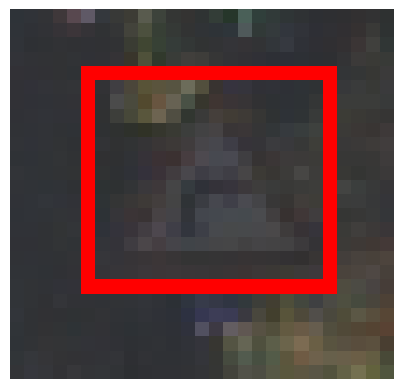

In [112]:
i = 1
img_path = "C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/train/images/"+str(i).zfill(8)+".png"

with open("C:/Users/morti/Desktop/FYP/Datasets/GTSRB_YOLO/train/labels/"+str(i).zfill(8)+".txt", "r") as file:
    data = file.read().split(" ")
    box = convert_bbox_format_to_center_w_h(int(data[1]), int(data[2]), int(data[3]), int(data[4]))
    print(class_ids[int(data[0])])
    display_image_box(img_path, box)
